**TASK 1    IRIS Detection**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/IRIS.csv")

In [ ]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 96.67%


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


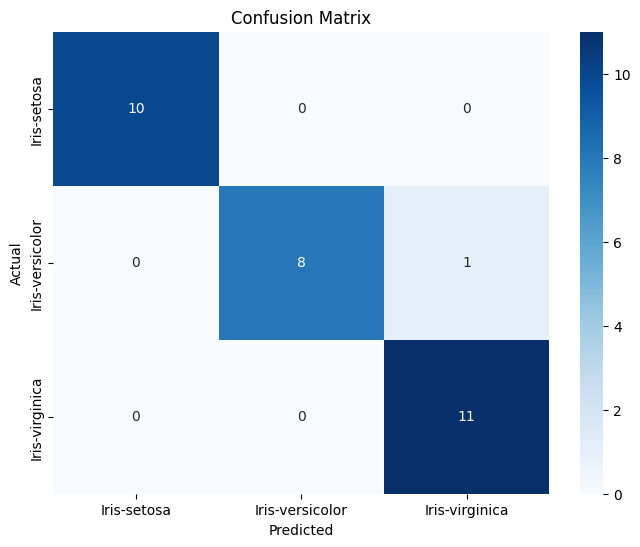

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**TASK 2    Unemployment Analysis**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
file_path = "/content/unemployment_data.csv"
df = pd.read_csv(file_path)


In [24]:
df.columns = df.columns.str.strip()


In [25]:
df["Population"] = df["Population"].str.replace(',', '', regex=True).astype(float)

In [26]:
categorical_cols = ["Country", "Age Group", "Education Level", "Industry", "Region"]
label_encoders = {}

In [27]:
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [28]:
X = df.drop(columns=["Unemployment Rate (%)"])
y = df["Unemployment Rate (%)"]


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [31]:
X_train = np.nan_to_num(X_train).astype(float)
y_train = np.nan_to_num(y_train).astype(float)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [35]:
print("\n Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")




 Model Evaluation:
Mean Absolute Error (MAE): 29.83
Mean Squared Error (MSE): 892.02
Root Mean Squared Error (RMSE): 29.87
R-squared Score (R²): -1584.82


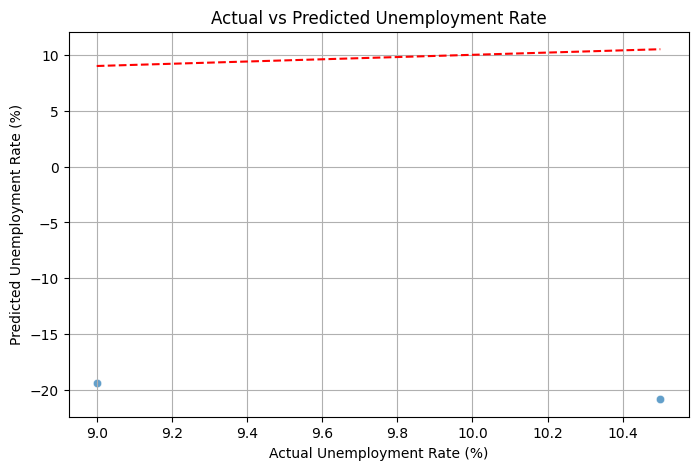

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Diagonal line
plt.xlabel("Actual Unemployment Rate (%)")
plt.ylabel("Predicted Unemployment Rate (%)")
plt.title("Actual vs Predicted Unemployment Rate")
plt.grid(True)
plt.show()


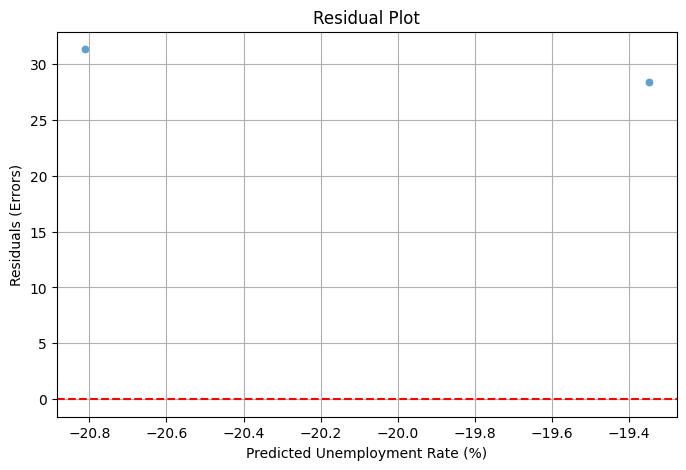

In [40]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Unemployment Rate (%)")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


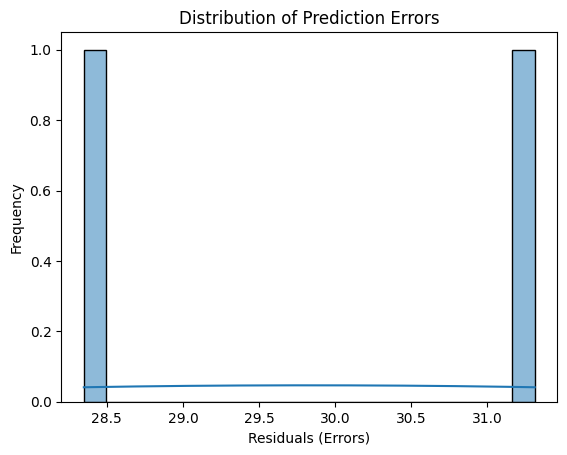

In [38]:
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


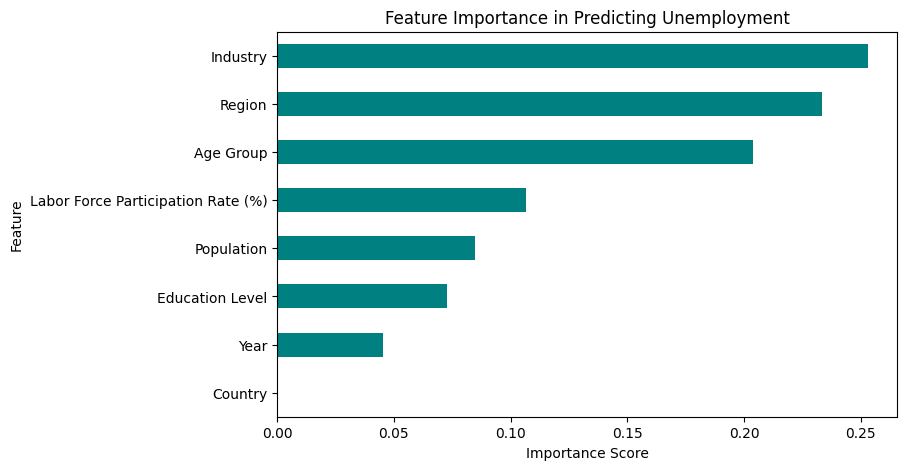

In [42]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


feature_importance = pd.Series(rf_model.feature_importances_, index=df.drop(columns=["Unemployment Rate (%)"]).columns)


feature_importance.sort_values().plot(kind="barh", figsize=(8,5), color="teal")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Unemployment")
plt.show()


**TASK 3 CAR PRICE PREDICTION**

Mean Absolute Error: 6709.918356721638
Mean Squared Error: 1381002009.061559
R-squared: -3.432018654856667


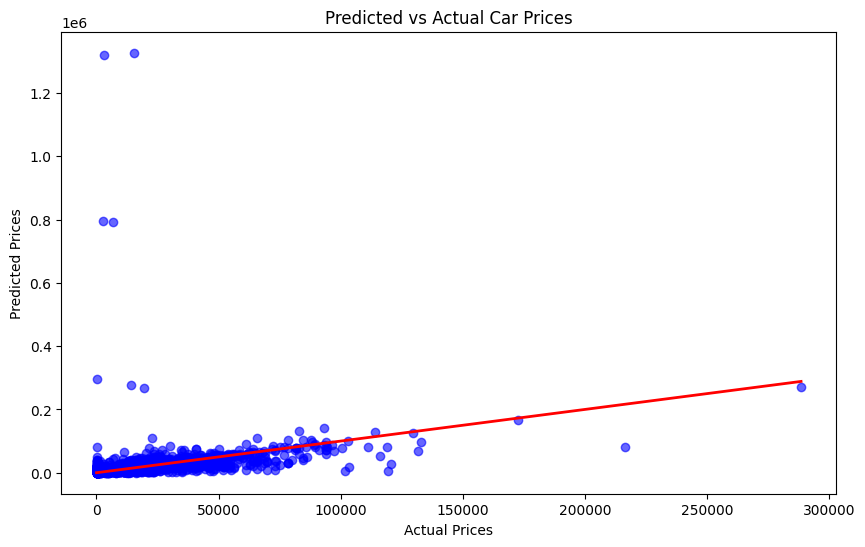

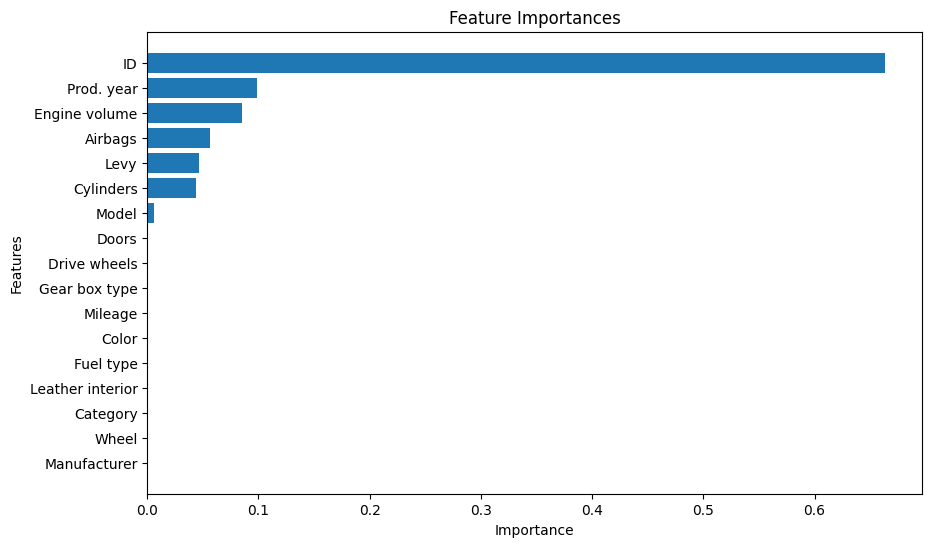

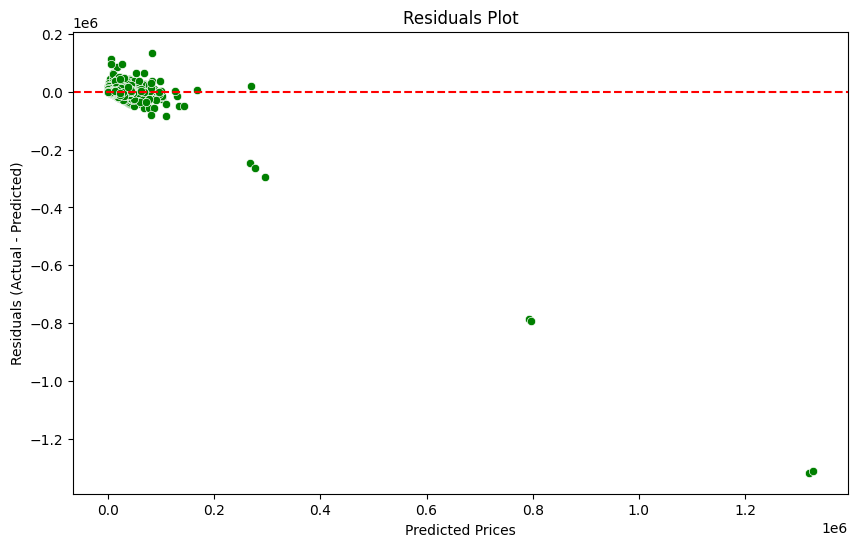

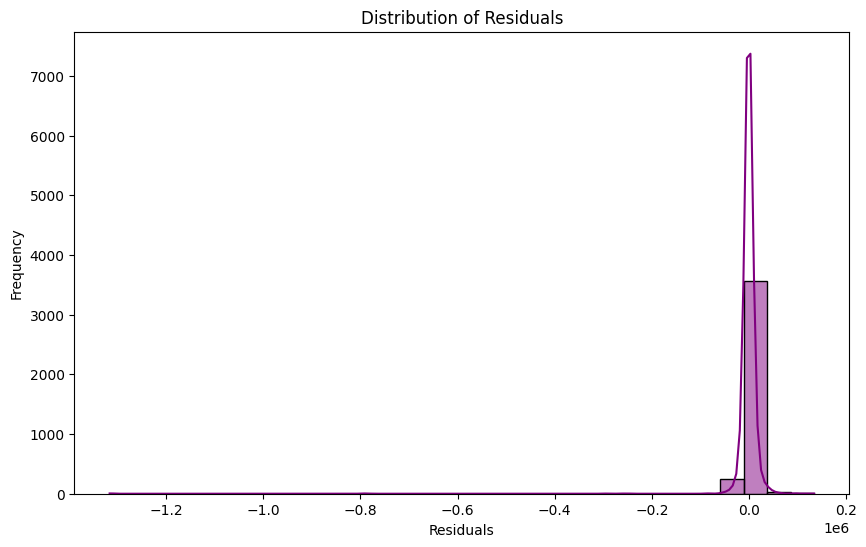

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv("/content/car_price_prediction.csv")


data.replace("-", np.nan, inplace=True)

data = data.apply(pd.to_numeric, errors='coerce')

numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

categorical_columns = data.select_dtypes(exclude=[np.number]).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)
plt.title("Predicted vs Actual Car Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

plt.figure(figsize=(10, 6))
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), features[indices])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


**TASK 4   Email Spam Detection**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/spam.csv')

In [ ]:
data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(data['Message'])

In [ ]:
y = data['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy*100:.2f}%")

Accuracy of the model: 98.21%


In [ ]:
cm = confusion_matrix(y_test, y_pred)

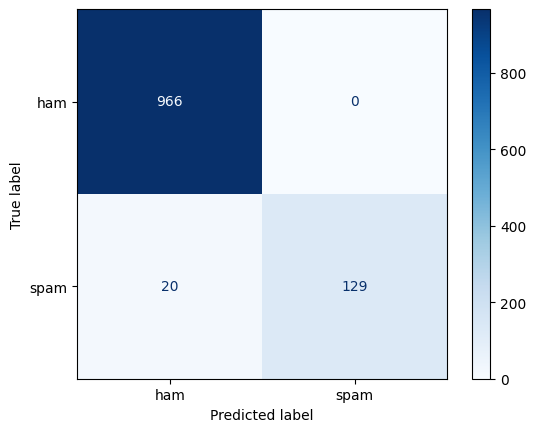

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ham", "spam"])
disp.plot(cmap='Blues')

In [ ]:
plt.show()

In [ ]:
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[966   0]
 [ 20 129]]


In [ ]:
new_message = ["Congratulations! You've won a free gift card. Click here to claim."]
new_message_tfidf = tfidf_vectorizer.transform(new_message)

In [ ]:
predicted_label = model.predict(new_message_tfidf)
predicted_category = "spam" if predicted_label == 1 else "ham"

In [ ]:
print(f"\nPredicted category for new message: {predicted_category}")


Predicted category for new message: spam


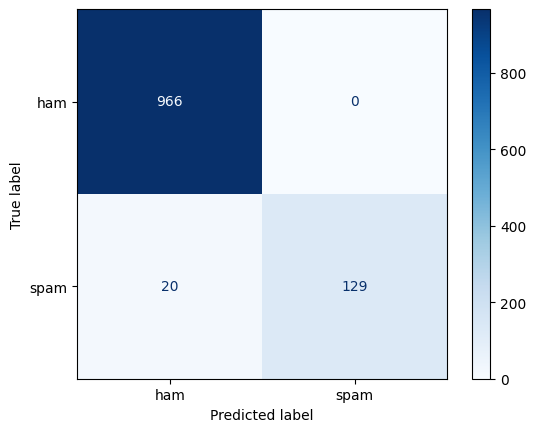


Confusion Matrix:
[[966   0]
 [ 20 129]]

Ham (non-spam) Specific Metrics:
True Positives (TP) for ham: 966
False Negatives (FN) for ham: 0
Precision for ham: 1.00
Recall for ham: 1.00

Predicted category for new ham message: ham


In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ham", "spam"])
disp.plot(cmap='Blues')

plt.show()

print("\nConfusion Matrix:")
print(cm)


TP_ham = cm[0, 0]
FN_ham = cm[0, 1]


precision_ham = TP_ham / (TP_ham + FN_ham) if (TP_ham + FN_ham) != 0 else 0
recall_ham = TP_ham / (TP_ham + FN_ham) if (TP_ham + FN_ham) != 0 else 0

print(f"\nHam (non-spam) Specific Metrics:")
print(f"True Positives (TP) for ham: {TP_ham}")
print(f"False Negatives (FN) for ham: {FN_ham}")
print(f"Precision for ham: {precision_ham:.2f}")
print(f"Recall for ham: {recall_ham:.2f}")

new_ham_message = ["Hey, how are you doing?"]
new_ham_message_tfidf = tfidf_vectorizer.transform(new_ham_message)

predicted_label = model.predict(new_ham_message_tfidf)
predicted_category = "spam" if predicted_label == 1 else "ham"

print(f"\nPredicted category for new ham message: {predicted_category}")


**TASK 5   Sales Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/content/advertising.csv')


In [ ]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


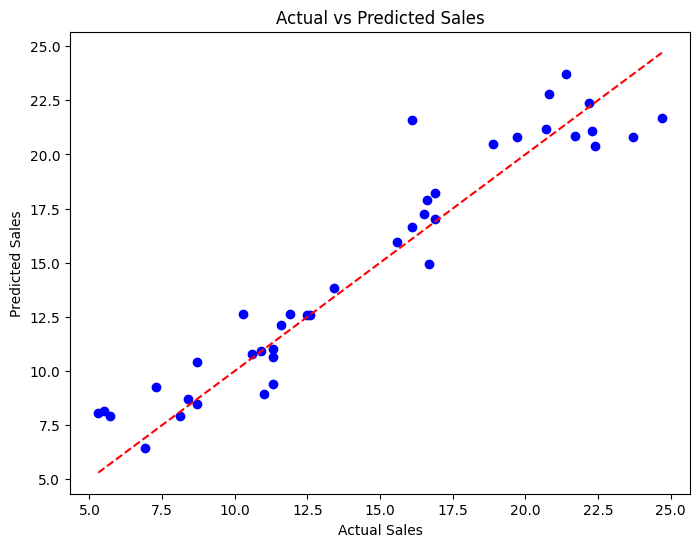

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [ ]:
new_data = pd.DataFrame({
    'TV': [150],
    'Radio': [50],
    'Newspaper': [30]
})

In [ ]:
predicted_sales = model.predict(new_data)
print(f'Predicted Sales for new data: {predicted_sales[0]}')

Predicted Sales for new data: 18.0678845521059
